# The Enumeration of Interactions

A _set of states_ is a finite set $S$ with the base state $\ast \in S$, and an _interaction_ on $S$ is a map $\phi: S \times S \to S \times S$ which satisfies that

$$
    \hat{\iota}(\phi(\hat{\iota}(\phi(s₁, s₂)))) = (s₁, s₂)
$$

where $\hat{\iota}(s₁, s₂) := (s₂, s₁)$ for any $s₁, s₂ \in S$ such that $\phi(s₁, s₂) \neq (s₁, s₂)$.

The function `enumerate_interactions` in the module `InteractionsEnumeration` enumerates all interactions $\phi$ with a number given as a size of the set $S$ of states.


In [67]:
import Pkg
Pkg.activate(".")
import Logging
Logging.disable_logging(Logging.Warn)

  Activating project at `c:\Users\User\LargeScaleInteractingSystems`


LogLevel(1001)

#### Required:

- [`JuMP` v0.22.3](https://jump.dev/)
- [`ConstraintSolver` v0.9.2](https://wikunia.github.io/ConstraintSolver.jl/stable/)
- [`JLD2` v.0.4.25](https://juliaio.github.io/JLD2.jl/dev/)


In [68]:
include("RequiredPackages.jl")

   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Project.toml`
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Project.toml`
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Project.toml`
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Project.toml`
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Project.toml`
  No Changes to `C:\Users\User\LargeScaleInteractingSystems\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\LargeScaleInteractingSyste

In [69]:
# using modules
using LargeScaleInteractingSystems.States:
    StateSet
using LargeScaleInteractingSystems.Interactions:
    Interaction,
    interaction_plot
using LargeScaleInteractingSystems.ConservedQuantities:
    conserved_quantities
using LargeScaleInteractingSystems.InteractionsEnumeration:
    enumerate_interactions

using FileIO, JLD2

precompile(enumerate_interactions, (StateSet, Int))
precompile(interaction_plot, (Interaction,))
precompile(conserved_quantities, (Interaction,))

true

## First example; the case of $\#S = 2$

We will check that there are 18 interactions on $S$ the set $S = \{0 = \ast, 1\}$ of states.


In [70]:
# #S = 2
state_size = 2
state_set = StateSet(state_size)
interactions2 = enumerate_interactions(state_set)
println()
println("number of interactions: ", length(interactions2))

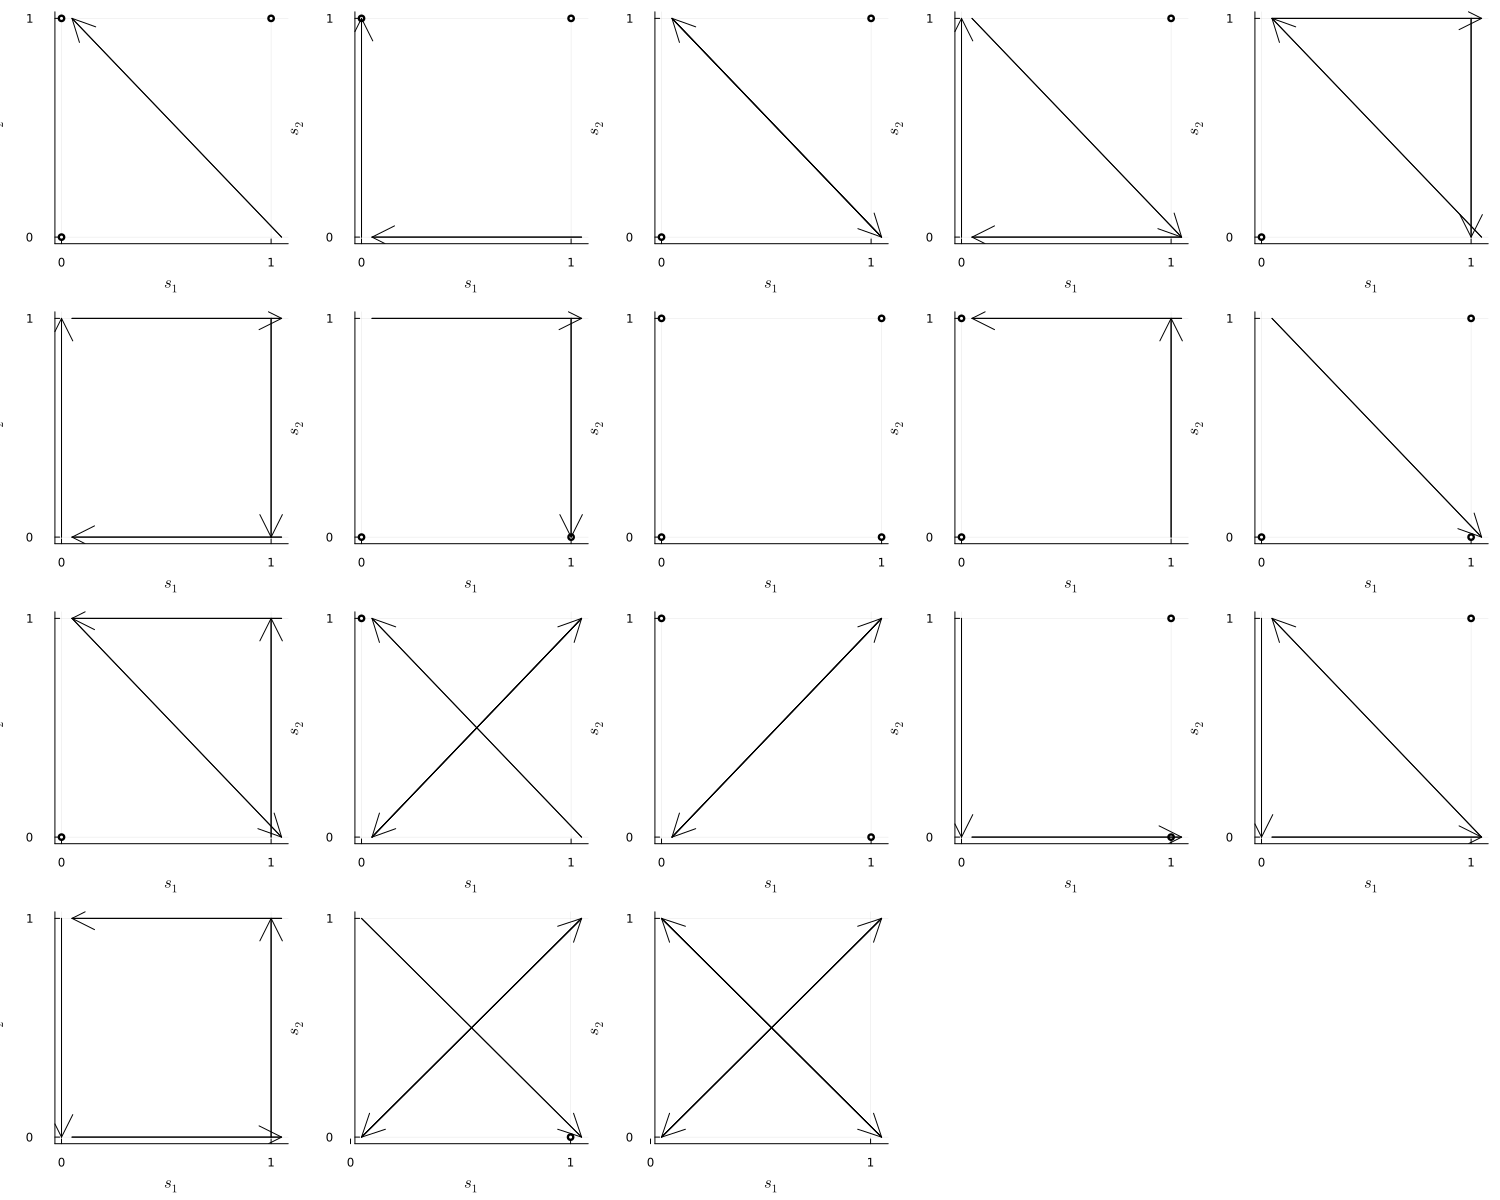

In [71]:
# display interactions
using Plots
plots = [interaction_plot(intr) for intr ∈ interactions2]
plot(plots..., layout=18, size=(1500, 1200))

## Combinatorics

The number of interactions is explosively increasing with the number of states.

The lower and upper bound of the number of interactions with respect to the number of states are given by the following way.
First we consider the class $\mathcal{I}'$ of interactions $ϕ: S × S → S × S$ which satisfy that $\hat{ι}(ϕ(\hat{ι}(ϕ(s₁, s₂)))) = (s₁, s₂)$ for _arbitrary_ $s₁, s₂ ∈ S$.
With composing $ϕ$ with $\hat{ι}$ we can regard any interaction $ϕ$ in $\mathcal{I}'$ as a directed graph $G_ϕ$ on $S × S$, which is symmetry and of indegree and outdegree 1 (can include loops).
The perspective gives us that the number of interactions in $\mathcal{I}'$ coincides to the number of (unnecessary to be complete) matchings on the complete graph $K_{\#S²}$, which is known as the telephone number $T(\#S²)$.

Moreover, we can see that every general interaction $ϕ$ can be considered as some interaction $ϕ'$ in $\mathcal{I}'$ which does not include an edge $(s₁, s₂) → (s₂, s₁)$ for $s₁, s₂ ∈ S$, replaced some loops $(s₁, s₂) → (s₁, s₂)$ into edges $(s₁, s₂) → (s₂, s₁)$.
Now let $M$ be the matching on $K_{\#S^2}$ which corresponds with the interaction $ϕ'$.
Then the choice of loops $(s₁, s₂) → (s₁, s₂)$ where $s₁ \neq s₂$ occurs variations of interactions.
If let $χ_{ϕ'}$ be the number of loops $(s₁, s₂) → (s₁, s₂)$ where $s₁ ≠ s₂$ then the number of variations for $ϕ' ∈ \mathcal{I}'$ is given by $2^{χ_{ϕ'}}$.
As $\#S(\#S-1) < χ_{ϕ'} < \#S²$ we have the lower and upper bound

$$
    ∑_{k=0}^{⌊ n²/2 ⌋} 2^{\#S(\#S-1)-2k} \#\{\text{$2k$-matchings on $K_{\#S^2} ⧵ ⨆_{\frac{1}{2}\#S(\#S-1)} K_2$}\} < \#\{\text{interactions on $S$}\} < ∑_{k=0}^{⌊ n^2/2 ⌋} 2^{\#S²-2k} \#\{\text{$2k$-matchings on $K_{\#S²} ⧵ ⨆_{\frac{1}{2}\#S(\#S-1)} K_2$}\},
$$

where the graph $K_{\#S^2} ⧵ ⨆_{\frac{1}{2}\#S(\#S-1)} K_2$ is the complete graph $K_{\#S^2}$ without $k$ disjoint edges.


In [72]:
# calculate lower and upper bounds for the number of interactions

odd_factorial(k) = k ≤ 1 ? 1 : big(k) * odd_factorial(k - 2)

# number of 2k-matchings on n vertices
MK(n, k) = binomial(big(n), big(2k)) * odd_factorial(2k - 1)

# number of 2k-matchings on K_{n^2} - K_2 * n(n-1)/2
# with the inclusion-exclusion principle(TODO: check carefully)
M(n, k) = sum((-1)^i * MK(n^2 - 2i, k - i) * binomial(big(div(n * (n - 1), 2)), big(i)) for i ∈ 0:k)

lower_bound(n::Int) =
    sum(M(n, k) * 2.0^(n^2 - n - 2k) for k ∈ 0:(n^2÷2))

upper_bound(n::Int) =
    sum(M(n, k) * 2^(n^2 - 2k) for k ∈ 0:(n^2÷2))

for i ∈ 2:10
    println(Float64(lower_bound(i)), " < {interactions on #S=", i, "} < ", Float64(upper_bound(i)))
end

## The case of $\#S = 3$

Let us try to enumerate interactions on $S = \{0 = \ast, 1, 2\}$.


In [123]:
# #S = 3
state_size = 3
state_set = StateSet(state_size)
println("calculating ...")
redirect_stdout(devnull)    # silent
interactions3 = enumerate_interactions(state_set)   # it costs about 14 minutes
# interactions3 = enumerate_interactions(state_set, 120) # set time limit
redirect_stdout(stdout)     # back to normal
println("writing ...")
redirect_stdout(devnull)    # silent
write("interactions3.dat", string([[intr.map(i, j) for i ∈ 1:2, j ∈ 1:2] for intr ∈ interactions3])) # write interactions
# TODO: load interactions from file
redirect_stdout(stdout)     # back to normal
length(interactions3)   # number of calculated interactions, not all

10596

These are the initial 20 samples of interactions on $S = \{0 = \ast, 1, 2\}$.


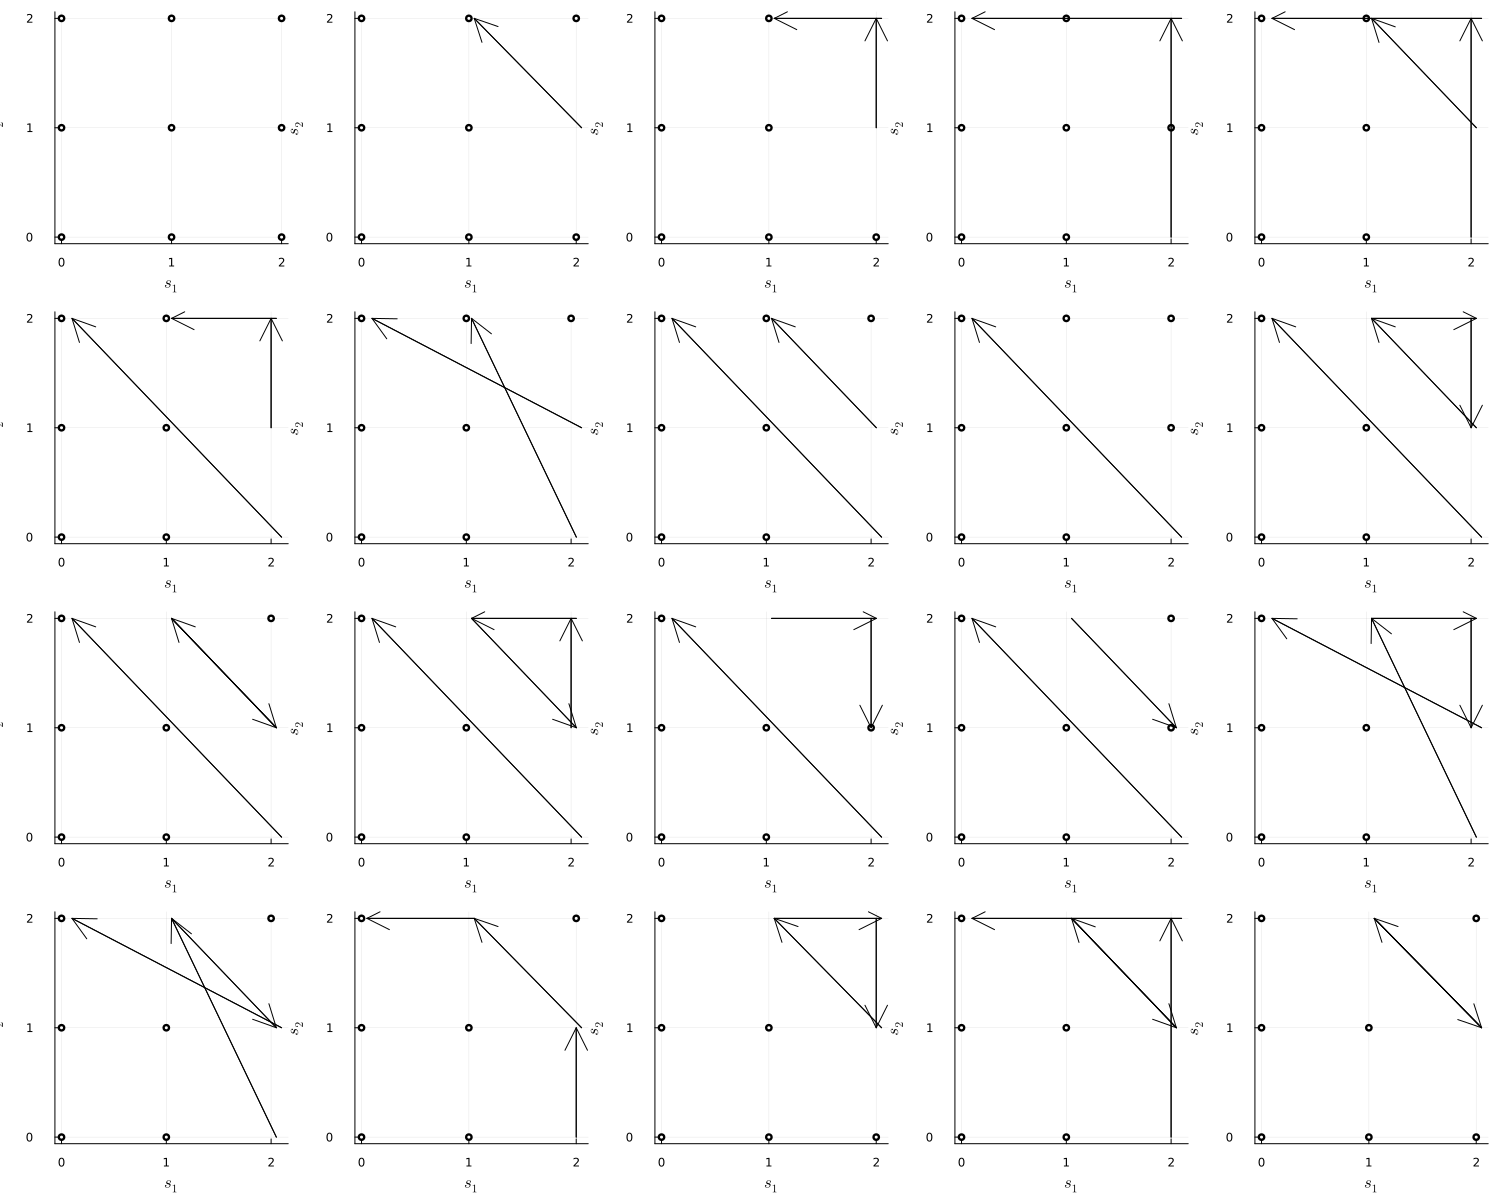

In [74]:
# display interactions
using Plots
n = 20
plots = [interaction_plot(interactions3[i]) for i ∈ 1:n]
plot(plots..., layout=n, size=(1500, 1200))

## Conserved Quantities


In [75]:
cqs2 = [conserved_quantities(intr) for intr ∈ interactions2]

18-element Vector{Nemo.ZZMatrix}:
 [1]
 1 by 0 empty matrix
 [1]
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 [1]
 1 by 0 empty matrix
 [1]
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix
 1 by 0 empty matrix

In [76]:
cqs3 = [conserved_quantities(intr) for intr ∈ interactions3]

1539-element Vector{Nemo.ZZMatrix}:
 [1 0; 0 1]
 [1 0; 0 1]
 [1; 1]
 [1; 0]
 [1; 0]
 [1; 1]
 [0; 1]
 [1 0; 0 1]
 [1 0; 0 1]
 [1; 1]
 ⋮
 2 by 0 empty matrix
 2 by 0 empty matrix
 2 by 0 empty matrix
 2 by 0 empty matrix
 [2; 1]
 [2; 1]
 2 by 0 empty matrix
 2 by 0 empty matrix
 2 by 0 empty matrix

In [77]:
# interactions with nontrivial space of conserved quantities
interactions3_nontrivial_cq = [intr for intr ∈ interactions3 if size(conserved_quantities(intr))[2] ≠ 0]
println("all:", length(interactions3))
println("nontrivial Consv:", length(interactions3_nontrivial_cq))


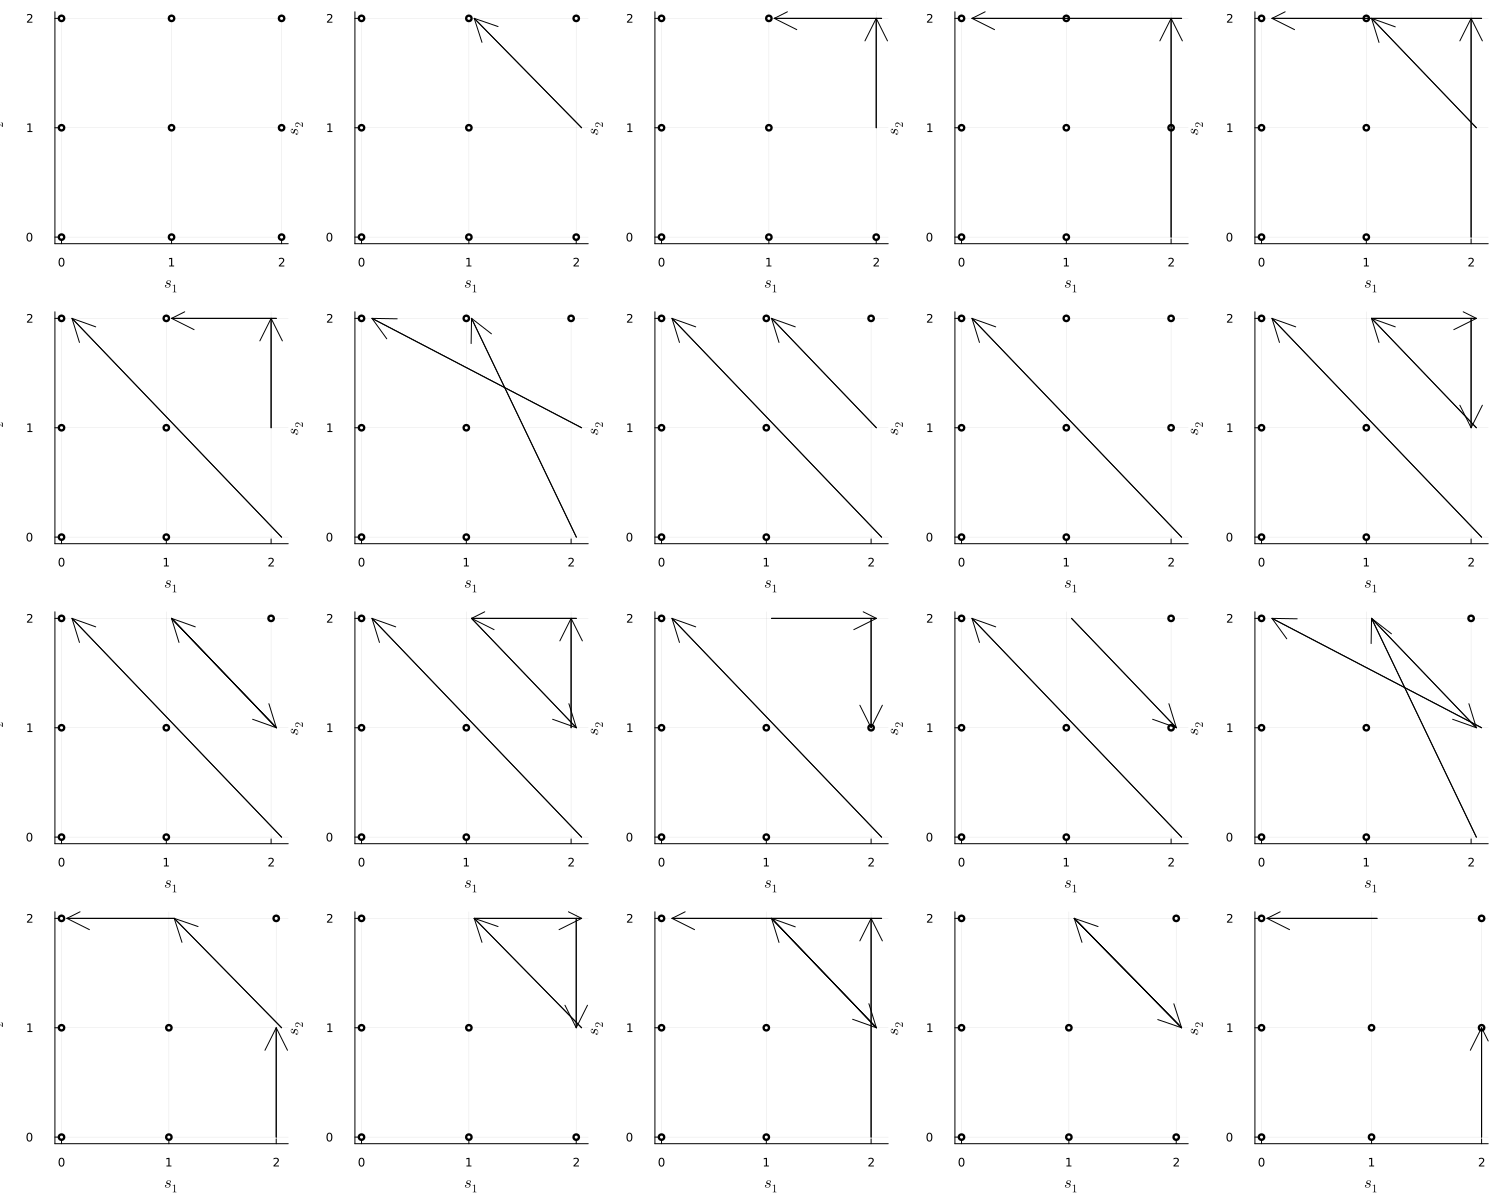

In [78]:
# plot interactions which has nontrivial space of conserved quantities
n = 20
plots = [interaction_plot(interactions3_nontrivial_cq[i]) for i ∈ 1:n]
plot(plots..., layout=n, size=(1500, 1200))

In [79]:
# interactions with 1-dimensional space of conserved quantities
interactions3_1_cq = [intr for intr ∈ interactions3 if size(conserved_quantities(intr))[2] == 1]
println("all:", length(interactions3))
println("1-dim Consv:", length(interactions3_1_cq))

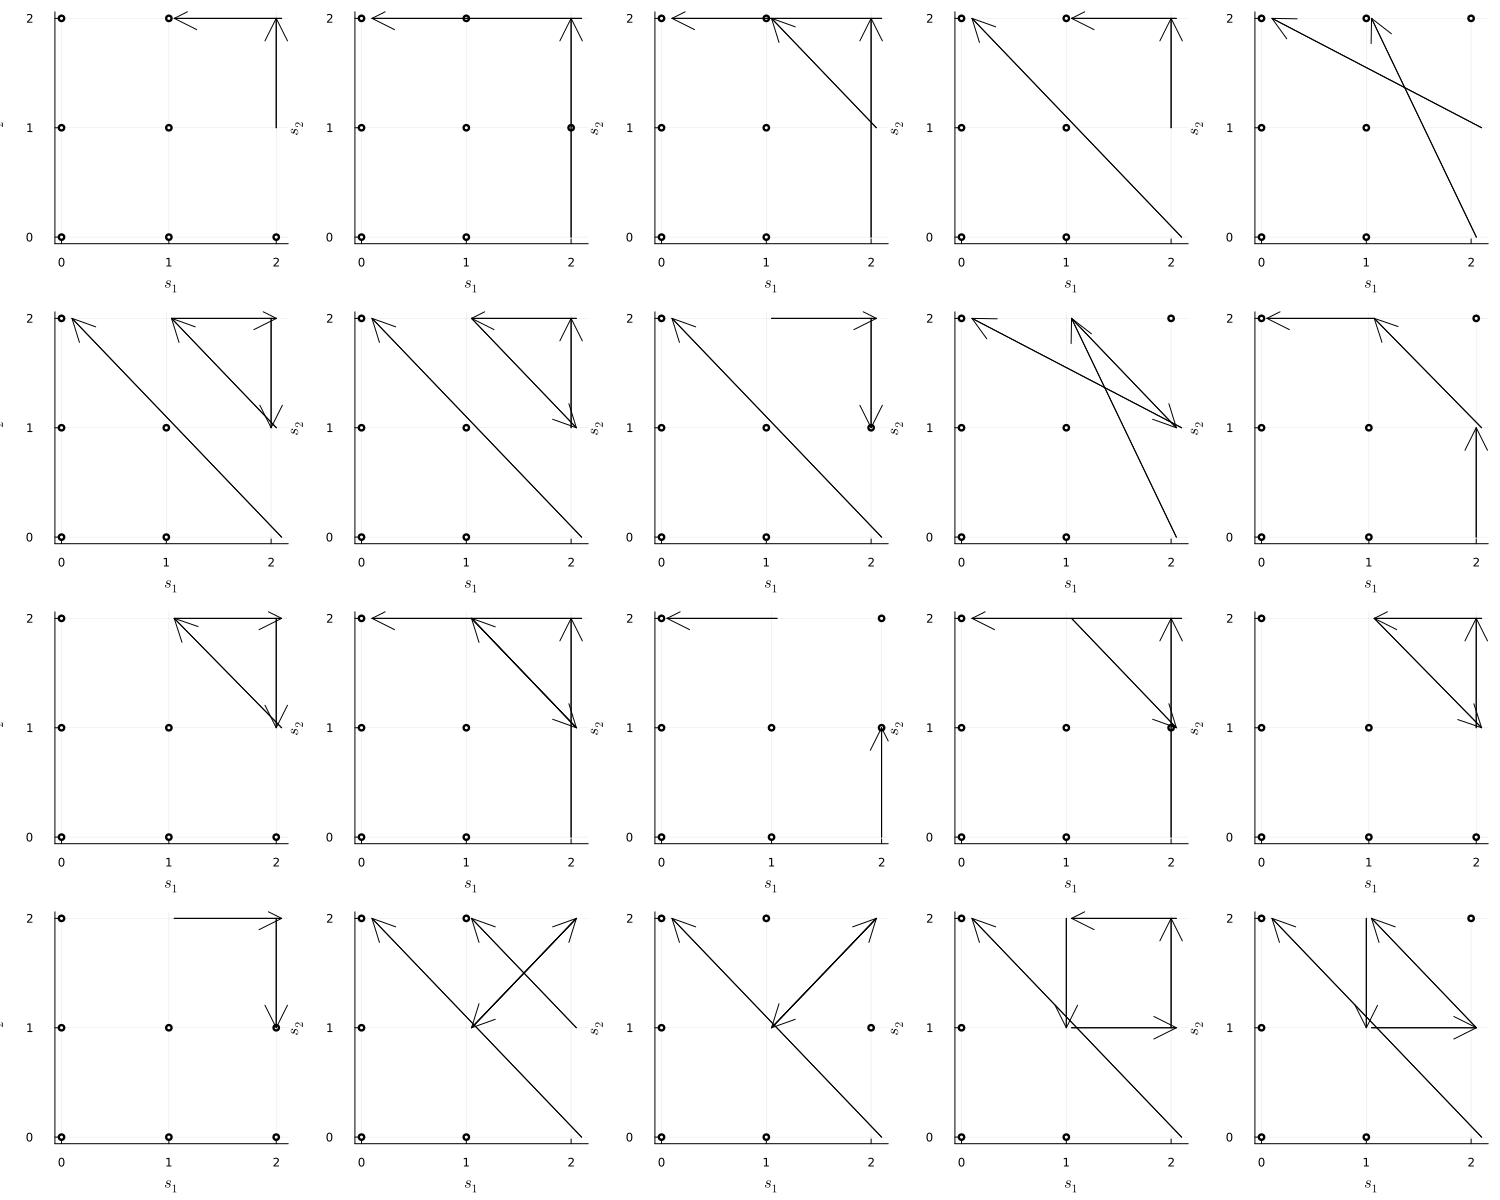

In [80]:
# plot interactions which has 1-dimensional space of conserved quantities
n = 20
plots = [interaction_plot(interactions3_1_cq[i]) for i ∈ 1:n]
plot(plots..., layout=n, size=(1500, 1200))

In [81]:
# check if the monoid generated by each values of conserved quantities is isomorphic to either ℕ or ℤ
function is_generated_monoid_N_or_Z(vec)
    s = 0
    min = -1
    for g ∈ vec
        if s == 0 && g ≠ 0
            s = sign(g)
        end
        if s ≠ 0 && g ≠ 0 && s ≠ sign(g)
            return true
        end
        abs_g = abs(g)
        if g ≠ 0 && (min == -1 || abs_g < min)
            min = abs_g
        end
    end
    all(map(x -> x % min == 0, vec))
end

is_generated_monoid_N_or_Z (generic function with 1 method)

In [82]:
# check on #S = 3
unique([conserved_quantities(intr) for intr ∈ interactions3_1_cq])
all([is_generated_monoid_N_or_Z(cq) for cq ∈ unique([conserved_quantities(intr) for intr ∈ interactions3_1_cq])])

true

# $\#S = 4$


In [83]:
# #S = 4
state_size = 4
state_set = StateSet(state_size)
println("calculating ...")
redirect_stdout(devnull)    # silent
# interactions4 = enumerate_interactions(state_set)
interactions4 = enumerate_interactions(state_set, 30) # set time limit
redirect_stdout(stdout)     # back to normal
println("writing ...")
redirect_stdout(devnull)    # silent
write("interactions4.dat", string([[intr.map(i, j) for i ∈ 1:state_size-1, j ∈ 1:state_size-1] for intr ∈ interactions4])) # write interactions
# TODO: load interactions from file
redirect_stdout(stdout)     # back to normal
length(interactions4)   # number of calculated interactions, not all

85

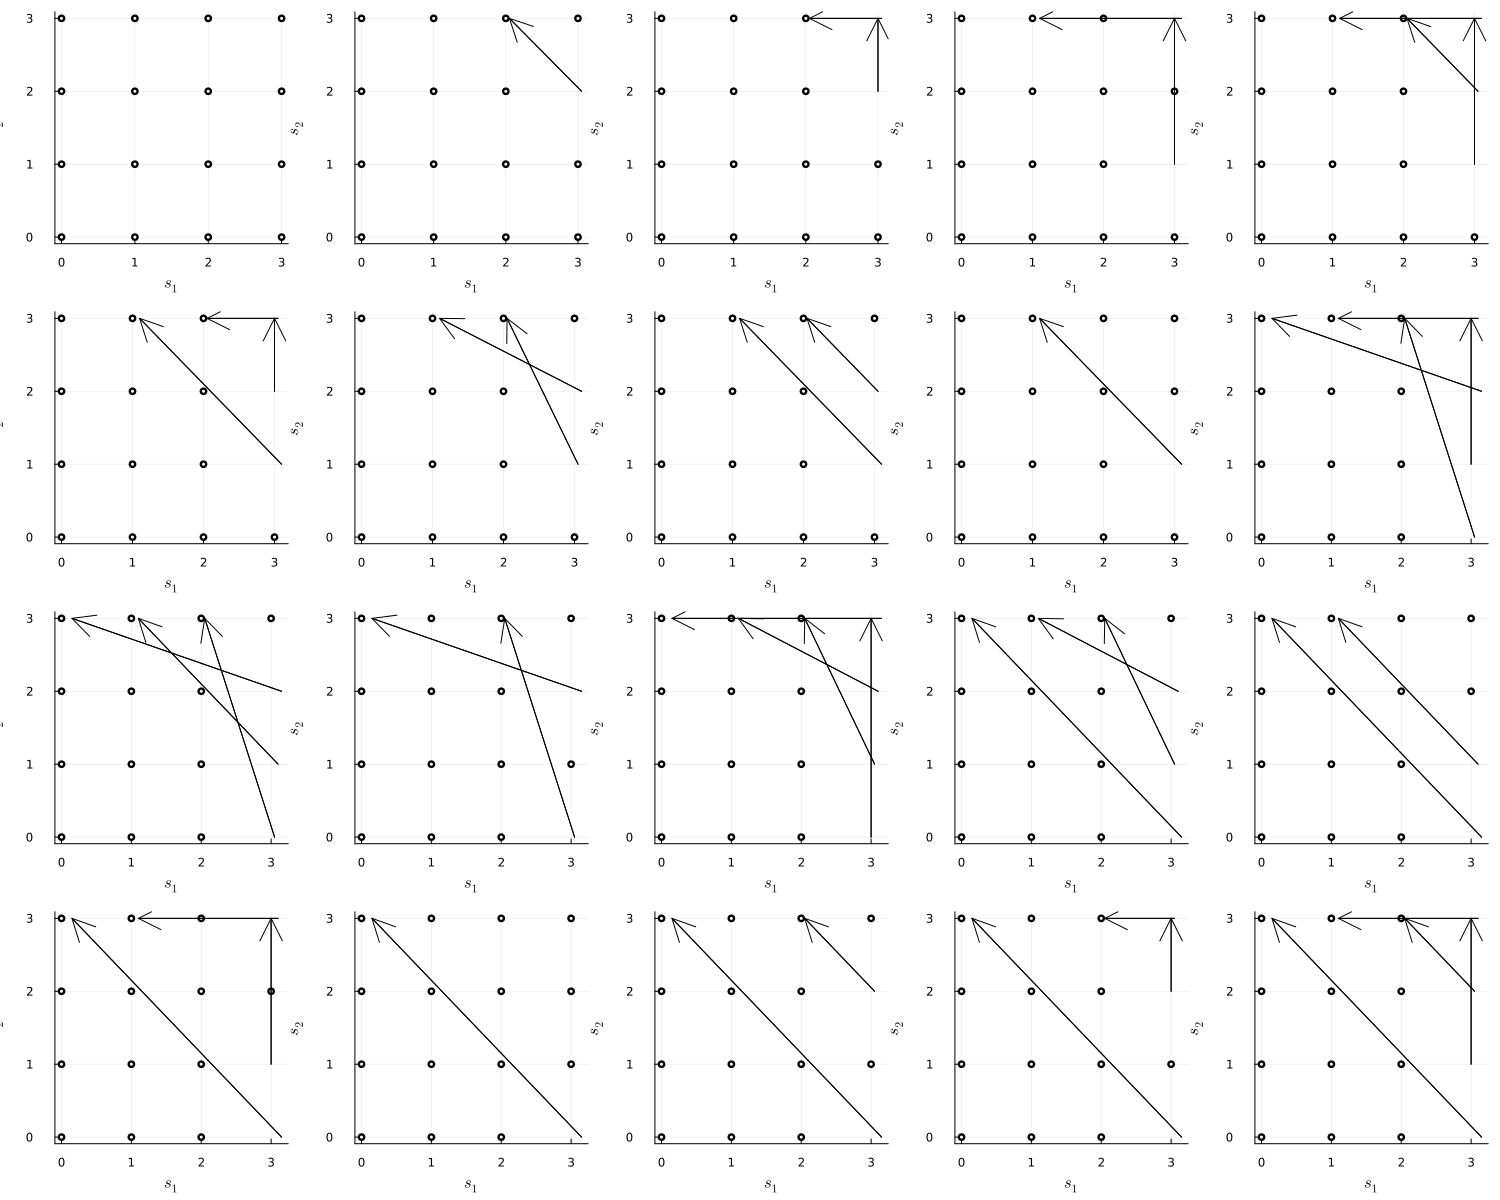

In [84]:
# display interactions
using Plots
n = 20
plots = [interaction_plot(interactions4[i]) for i ∈ 1:n]
plot(plots..., layout=n, size=(1500, 1200))

In [85]:
# interactions with 1-dimensional space of conserved quantities
interactions4_1_cq = [intr for intr ∈ interactions4 if size(conserved_quantities(intr))[2] == 1]
length(interactions4_1_cq)

19

In [86]:
# check on #S = 4
unique([conserved_quantities(intr) for intr ∈ interactions4_1_cq])
all([is_generated_monoid_N_or_Z(cq) for cq ∈ unique([conserved_quantities(intr) for intr ∈ interactions4_1_cq])])

true

In [90]:
# check if an interaction is exchangeable/2-irreducibly quantified

# union find tree on S × S
struct UF
    parents::Array{Tuple{Int,Int},2}
    ranks::Array{Int,2}

    function UF(n)
        parents = [(i, j) for i ∈ 1:n, j ∈ 1:n]
        ranks = zeros(Int, n, n)
        new(parents, ranks)
    end
end

function find(uf::UF, i, j)
    if uf.parents[i, j] == (i, j)
        return (i, j)
    else
        uf.parents[i, j] = find(uf, uf.parents[i, j]...)
        return uf.parents[i, j]
    end
end

function union!(uf::UF, i1, j1, i2, j2)
    p1 = find(uf, i1, j1)
    p2 = find(uf, i2, j2)
    if p1 == p2
        return
    end
    if uf.ranks[p1...] < uf.ranks[p2...]
        uf.parents[p1...] = p2
    elseif uf.ranks[p1...] > uf.ranks[p2...]
        uf.parents[p2...] = p1
    else
        uf.parents[p2...] = p1
        uf.ranks[p1...] += 1
    end
end

function is_same(uf::UF, i1, j1, i2, j2)
    find(uf, i1, j1) == find(uf, i2, j2)
end

function num_roots(intr::Interaction)
    uf = UF(intr.state_set.size)

    for i ∈ 1:intr.state_set.size, j ∈ 1:intr.state_set.size, k ∈ 1:intr.state_set.size, l ∈ 1:intr.state_set.size
        if intr.map(i - 1, j - 1) == (k - 1, l - 1)
            union!(uf, i, j, k, l)
        end
    end

    roots = [roots for roots ∈ [find(uf, i, j) for i ∈ 1:intr.state_set.size for j ∈ 1:intr.state_set.size]]

    unique!(roots)

    return length(roots)
end

function is_exchangeable(intr::Interaction)
    uf = UF(intr.state_set.size)

    for i ∈ 1:intr.state_set.size, j ∈ 1:intr.state_set.size, k ∈ 1:intr.state_set.size, l ∈ 1:intr.state_set.size
        if intr.map(i - 1, j - 1) == (k - 1, l - 1)
            union!(uf, i, j, k, l)
        end
    end

    for i ∈ 1:intr.state_set.size, j ∈ 1:intr.state_set.size
        if !is_same(uf, i, j, j, i)
            return false
        end
    end
    return true
end

function num_sum_image(intr::Interaction)
    consv = conserved_quantities(intr)

    values = [
        [
            consv[i, k] + consv[j, k]
            for k ∈ 1:size(consv)[2]
        ]
        for i ∈ 1:size(consv)[1] for j ∈ 1:size(consv)[1] if i <= j
    ]

    append!(values, [[consv[i, k] for k ∈ 1:size(consv)[2]] for i ∈ 1:size(consv)[1]], [[0 for k ∈ 1:size(consv)[2]]])

    length(unique!(values))
end

function is_two_irr_quantified(intr::Interaction)
    num_roots(intr) == num_sum_image(intr)
end

[2]
[1]

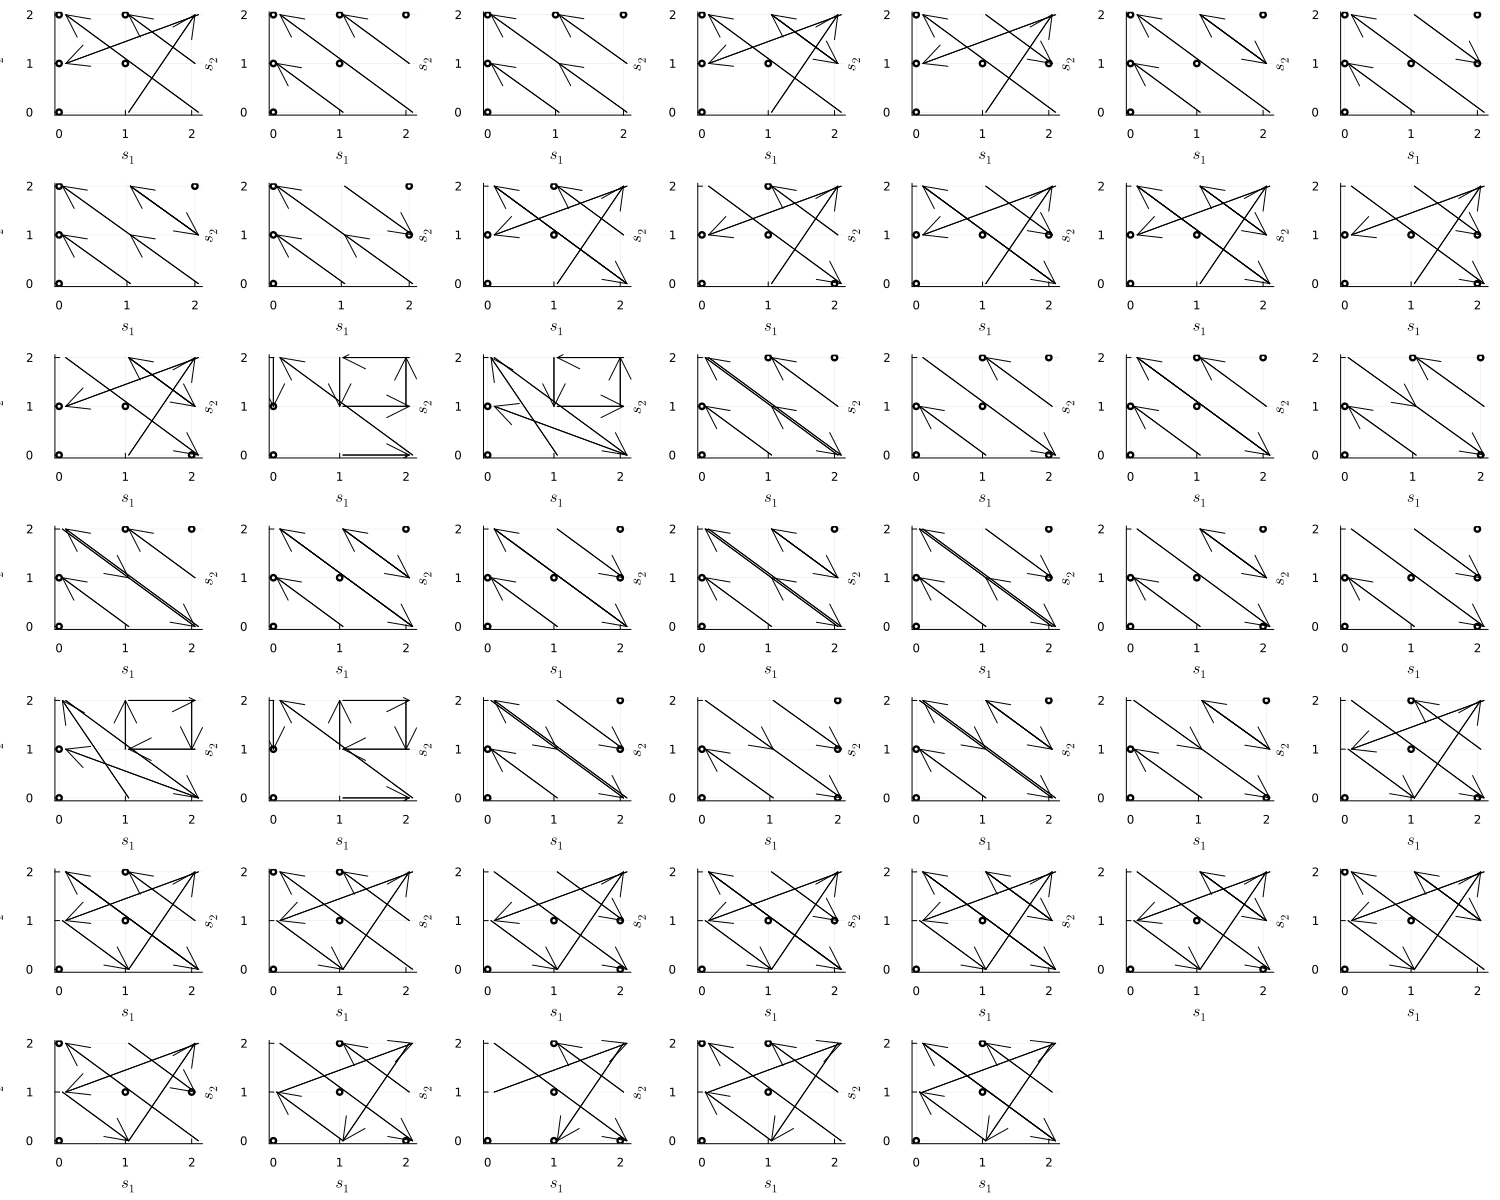

In [122]:
two_irr_quantified3 = [intr for intr ∈ interactions3 if is_two_irr_quantified(intr)]

n = length(two_irr_quantified3)
plots = [interaction_plot(intr) for intr ∈ two_irr_quantified3]
plot(plots..., layout=n, size=(1500, 1200))

## References

[1] [Bannai, Kenichi and Kametani, Yukio and Sasada, Makiko. Topological Structures of Large Scale Interacting Systems via Uniform Functions and Forms. 2020.](https://arxiv.org/abs/2009.04699v4)
